# hotel

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import numpy as np

# 데이터 로드
df = pd.read_csv("/Users/hyunwoo/Desktop/PADA_LAB/raw/hotel.csv")

# 텍스트 데이터를 전처리
df['Review_Text'] = df['Review_Text'].fillna('')

# 텍스트 데이터를 TF-IDF 벡터로 변환
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Review_Text'])

# NMF 모델을 사용하여 주제 모델링 수행
num_topics = 20  # 원하는 주제의 개수 설정
nmf = NMF(n_components=num_topics, random_state=42)
nmf.fit(X)

# 각 주제에 대한 단어 목록 출력
terms = np.array(vectorizer.get_feature_names_out())
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([terms[i] for i in topic.argsort()[:-11:-1]]))
    print()

# 주제 기여도를 0이면 아주 작은 값으로 대체
topic_contributions = nmf.transform(X)
topic_contributions = np.maximum(topic_contributions, 1e-20)  # 0을 매우 작은 값으로 대체

# 주제 기여도를 정규화
topic_contributions_normalized = topic_contributions / topic_contributions.sum(axis=1)[:, np.newaxis]

# 각 문서에 대해 Depth 계산 (p * log(p)의 합)
depth = -1 * np.sum(topic_contributions_normalized * np.log10(topic_contributions_normalized), axis=1)

# KL Divergence 계산 함수 (Breadth 계산)
def calculate_kl_divergence(review_topic_proportions, global_topic_proportions):
    # 0이 발생하지 않도록 작은 값 추가
    review_topic_proportions = review_topic_proportions + 1e-10
    global_topic_proportions = global_topic_proportions + 1e-10
    
    # KL 발산 계산
    kl_divergence = np.sum(review_topic_proportions * np.log2(review_topic_proportions / global_topic_proportions))
    
    # NaN 또는 Inf 값이 발생할 경우 NaN 반환
    if np.isnan(kl_divergence) or np.isinf(kl_divergence):
        return np.nan
    return kl_divergence

# 전체 문서에 대한 주제 비율의 평균 계산 (global_topic_proportions)
global_topic_proportions = np.mean(topic_contributions_normalized, axis=0)

# 각 문서에 대해 KL 발산(Breadth) 계산
breadth = np.apply_along_axis(lambda x: calculate_kl_divergence(x, global_topic_proportions), axis=1, arr=topic_contributions_normalized)

# DataFrame에 depth와 breadth 추가
df['depth'] = depth
df['breadth'] = breadth

# 주제 기여도 정규화된 값도 DataFrame에 추가
for i in range(num_topics):
    df[f"Topic_{i+1}"] = topic_contributions_normalized[:, i]

# 정규화된 결과를 CSV로 저장
df.to_csv('hotel_reviews_with_topics_and_depth_breadth.csv', index=False)

print("Topic distribution with depth and breadth added to 'hotel_reviews_with_topics_and_depth_breadth.csv'")


Topic 1:
room size view spacious window tiny basement service booked fridge

Topic 2:
location cleanliness fantastic central price amazing convenient ideal brilliant near

Topic 3:
staff helpful reception amazing polite welcoming extremely kind pleasant fantastic

Topic 4:
good value money size price facilities service food selection choice

Topic 5:
great value money locationnothing facilities stay service comfy london price

Topic 6:
clean modern tidy quiet spacious comfy central convenient spotlessly comfortable

Topic 7:
close station tube walk easy train underground near london paddington

Topic 8:
small bathroom locationroom quite bed locationthe space locationvery extremely double

Topic 9:
breakfast choice continental included poor options food buffet cooked eggs

Topic 10:
excellent value service money facilities stay customer london choice restaurant

Topic 11:
shower didnt bathroom night hot water like check work bed

Topic 12:
nice area bar quiet place big comfy restaurant 

# amazon

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import numpy as np

# 데이터 로드
df = pd.read_csv("/Users/hyunwoo/Desktop/PADA_LAB/raw/amazon.csv")

# 텍스트 데이터를 전처리
df['Review_Text'] = df['Review_Text'].fillna('')

# 텍스트 데이터를 TF-IDF 벡터로 변환
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Review_Text'])

# NMF 모델을 사용하여 주제 모델링 수행
num_topics = 18  # 원하는 주제의 개수 설정
nmf = NMF(n_components=num_topics, random_state=42)
nmf.fit(X)

# 각 주제에 대한 단어 목록 출력
terms = np.array(vectorizer.get_feature_names_out())
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([terms[i] for i in topic.argsort()[:-11:-1]]))
    print()

# 주제 기여도를 0이면 아주 작은 값으로 대체
topic_contributions = nmf.transform(X)
topic_contributions = np.maximum(topic_contributions, 1e-20)  # 0을 매우 작은 값으로 대체

# 주제 기여도를 정규화
topic_contributions_normalized = topic_contributions / topic_contributions.sum(axis=1)[:, np.newaxis]

# 각 문서에 대해 Depth 계산 (p * log(p)의 합)
depth = -1 * np.sum(topic_contributions_normalized * np.log10(topic_contributions_normalized), axis=1)

# KL Divergence 계산 함수 (Breadth 계산)
def calculate_kl_divergence(review_topic_proportions, global_topic_proportions):
    # 0이 발생하지 않도록 작은 값 추가
    review_topic_proportions = review_topic_proportions + 1e-10
    global_topic_proportions = global_topic_proportions + 1e-10
    
    # KL 발산 계산
    kl_divergence = np.sum(review_topic_proportions * np.log2(review_topic_proportions / global_topic_proportions))
    
    # NaN 또는 Inf 값이 발생할 경우 NaN 반환
    if np.isnan(kl_divergence) or np.isinf(kl_divergence):
        return np.nan
    return kl_divergence

# 전체 문서에 대한 주제 비율의 평균 계산 (global_topic_proportions)
global_topic_proportions = np.mean(topic_contributions_normalized, axis=0)

# 각 문서에 대해 KL 발산(Breadth) 계산
breadth = np.apply_along_axis(lambda x: calculate_kl_divergence(x, global_topic_proportions), axis=1, arr=topic_contributions_normalized)

# DataFrame에 depth와 breadth 추가
df['depth'] = depth
df['breadth'] = breadth

# 주제 기여도 정규화된 값도 DataFrame에 추가
for i in range(num_topics):
    df[f"Topic_{i+1}"] = topic_contributions_normalized[:, i]

# 정규화된 결과를 CSV로 저장
df.to_csv('amazon_reviews_with_topics_and_depth_breadth.csv', index=False)

print("Topic distribution with depth and breadth added to 'hotel_reviews_with_topics_and_depth_breadth.csv'")


Topic 1:
great value sounds item worked looks buy little deal fast

Topic 2:
good value far pretty really money sounds looks buy radio

Topic 3:
works perfectly expected fine advertised described intended issues exactly charm

Topic 4:
use easy phone comfortable simple tablet laptop ipad keyboard battery

Topic 5:
easy install set sturdy setup super mount assemble range motion

Topic 6:
product excellent recommend apple described happy highly awesome fast advertised

Topic 7:
love ipad keyboard light color case absolutely cover durable stand

Topic 8:
sound speaker bass bose speakers bar volume headphones clear music

Topic 9:
tv mount remote wall samsung smart mounting inch mounted used

Topic 10:
perfect fit ipad size needed fits replacement tablet needs case

Topic 11:
work did didn doesn don return home tried money returned

Topic 12:
price worth excellent reasonable beat best headphones point especially decent

Topic 13:
like really charm original ipad looks don case feel keyboard

# audible

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import numpy as np

# 데이터 로드
df = pd.read_csv("/Users/jungsujin/PADA_LAB/raw/audible.csv")

# 텍스트 데이터를 전처리
df['Review_Text'] = df['Review_Text'].fillna('')

# 텍스트 데이터를 TF-IDF 벡터로 변환
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Review_Text'])

# NMF 모델을 사용하여 주제 모델링 수행
num_topics = 20  # 원하는 주제의 개수 설정
nmf = NMF(n_components=num_topics, random_state=42)
nmf.fit(X)

# 각 주제에 대한 단어 목록 출력
terms = np.array(vectorizer.get_feature_names_out())
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([terms[i] for i in topic.argsort()[:-11:-1]]))
    print()

# 주제 기여도를 0이면 아주 작은 값으로 대체
topic_contributions = nmf.transform(X)
topic_contributions = np.maximum(topic_contributions, 1e-20)  # 0을 매우 작은 값으로 대체

# 주제 기여도를 정규화
topic_contributions_normalized = topic_contributions / topic_contributions.sum(axis=1)[:, np.newaxis]

# 각 문서에 대해 Depth 계산 (p * log(p)의 합)
depth = -1 * np.sum(topic_contributions_normalized * np.log10(topic_contributions_normalized), axis=1)

# KL Divergence 계산 함수 (Breadth 계산)
def calculate_kl_divergence(review_topic_proportions, global_topic_proportions):
    # 0이 발생하지 않도록 작은 값 추가
    review_topic_proportions = review_topic_proportions + 1e-10
    global_topic_proportions = global_topic_proportions + 1e-10
    
    # KL 발산 계산
    kl_divergence = np.sum(review_topic_proportions * np.log2(review_topic_proportions / global_topic_proportions))
    
    # NaN 또는 Inf 값이 발생할 경우 NaN 반환
    if np.isnan(kl_divergence) or np.isinf(kl_divergence):
        return np.nan
    return kl_divergence

# 전체 문서에 대한 주제 비율의 평균 계산 (global_topic_proportions)
global_topic_proportions = np.mean(topic_contributions_normalized, axis=0)

# 각 문서에 대해 KL 발산(Breadth) 계산
breadth = np.apply_along_axis(lambda x: calculate_kl_divergence(x, global_topic_proportions), axis=1, arr=topic_contributions_normalized)

# DataFrame에 depth와 breadth 추가
df['depth'] = depth
df['breadth'] = breadth

# 주제 기여도 정규화된 값도 DataFrame에 추가
for i in range(num_topics):
    df[f"Topic_{i+1}"] = topic_contributions_normalized[:, i]

# 정규화된 결과를 CSV로 저장
df.to_csv('audible_reviews_with_optimal_topics.csv', index=False)

print("Topic distribution with depth and breadth added to 'hotel_reviews_with_topics_and_depth_breadth.csv'")


Topic 1:
book movie audio reading better im wait author thought start

Topic 2:
story beautiful told performance wonderful telling interesting music line end

Topic 3:
great performance overall series job acting voice cast awesome performances

Topic 4:
loved absolutely minute wait second end hearing funny way voice

Topic 5:
read years ago author school times books glad hearing having

Topic 6:
love beautiful series absolutely fell fall family voice stories loss

Topic 7:
recommend highly recommended definitely audiobook performance wonderful entertaining fantastic funny

Topic 8:
best ive books listened heard audio audible far favorite times

Topic 9:
good overall bit ending bad pretty performance little really interesting

Topic 10:
enjoyed really thoroughly liked music bit lot performance overall fun

Topic 11:
listen fun easy worth definitely wait voice enjoyable entertaining series

Topic 12:
amazing performance absolutely truly voice simply andy wow cast serkis

Topic 13:
listen

# coursera

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import numpy as np

# 데이터 로드
df = pd.read_csv("/Users/hyunwoo/Desktop/PADA_LAB/raw/coursera.csv", encoding = 'utf-8')

# 텍스트 데이터를 전처리
df['Review_Text'] = df['Review_Text'].fillna('')

# 텍스트 데이터를 TF-IDF 벡터로 변환
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Review_Text'])

# NMF 모델을 사용하여 주제 모델링 수행
num_topics = 20  # 원하는 주제의 개수 설정
nmf = NMF(n_components=num_topics, random_state=42)
nmf.fit(X)

# 각 주제에 대한 단어 목록 출력
terms = np.array(vectorizer.get_feature_names_out())
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([terms[i] for i in topic.argsort()[:-11:-1]]))
    print()

# 주제 기여도를 0이면 아주 작은 값으로 대체
topic_contributions = nmf.transform(X)
topic_contributions = np.maximum(topic_contributions, 1e-20)  # 0을 매우 작은 값으로 대체

# 주제 기여도를 정규화
topic_contributions_normalized = topic_contributions / topic_contributions.sum(axis=1)[:, np.newaxis]

# 각 문서에 대해 Depth 계산 (p * log(p)의 합)
depth = -1 * np.sum(topic_contributions_normalized * np.log10(topic_contributions_normalized), axis=1)

# KL Divergence 계산 함수 (Breadth 계산)
def calculate_kl_divergence(review_topic_proportions, global_topic_proportions):
    # 0이 발생하지 않도록 작은 값 추가
    review_topic_proportions = review_topic_proportions + 1e-10
    global_topic_proportions = global_topic_proportions + 1e-10
    
    # KL 발산 계산
    kl_divergence = np.sum(review_topic_proportions * np.log2(review_topic_proportions / global_topic_proportions))
    
    # NaN 또는 Inf 값이 발생할 경우 NaN 반환
    if np.isnan(kl_divergence) or np.isinf(kl_divergence):
        return np.nan
    return kl_divergence

# 전체 문서에 대한 주제 비율의 평균 계산 (global_topic_proportions)
global_topic_proportions = np.mean(topic_contributions_normalized, axis=0)

# 각 문서에 대해 KL 발산(Breadth) 계산
breadth = np.apply_along_axis(lambda x: calculate_kl_divergence(x, global_topic_proportions), axis=1, arr=topic_contributions_normalized)

# DataFrame에 depth와 breadth 추가
df['depth'] = depth
df['breadth'] = breadth

# 주제 기여도 정규화된 값도 DataFrame에 추가
for i in range(num_topics):
    df[f"Topic_{i+1}"] = topic_contributions_normalized[:, i]

# 정규화된 결과를 CSV로 저장
df.to_csv('coursera_reviews_with_topics_and_depth_breadth.csv', index=False)

print("Topic distribution with depth and breadth added to 'hotel_reviews_with_topics_and_depth_breadth.csv'")


Topic 1:
good content introduction really start explanation teaching instructor teacher overall

Topic 2:
great content introduction instructor teacher intro start class information job

Topic 3:
course interesting loved beginner wonderful recommend enjoyed love introductory fantastic

Topic 4:
excellent content teaching instructor teacher material introduction professor explanation work

Topic 5:
nice introduction explanation content teaching really instructor teacher work overview

Topic 6:
python programming dr chuck basic like data way introduction knowledge

Topic 7:
amazing instructor content teacher just really teaching absolutely dr professor

Topic 8:
awesome instructor chuck content dr just teacher teaching really simply

Topic 9:
best courses coursera taken far ve online instructor teacher seen

Topic 10:
thank coursera google dr sir chuck wonderful opportunity university team

Topic 11:
lot learned learnt things new enjoyed helped ve information really

Topic 12:
helpful re

Matplotlib is building the font cache; this may take a moment.


Optimal number of topics: 20
Results saved to 'hotel_reviews_with_optimal_topics.csv'


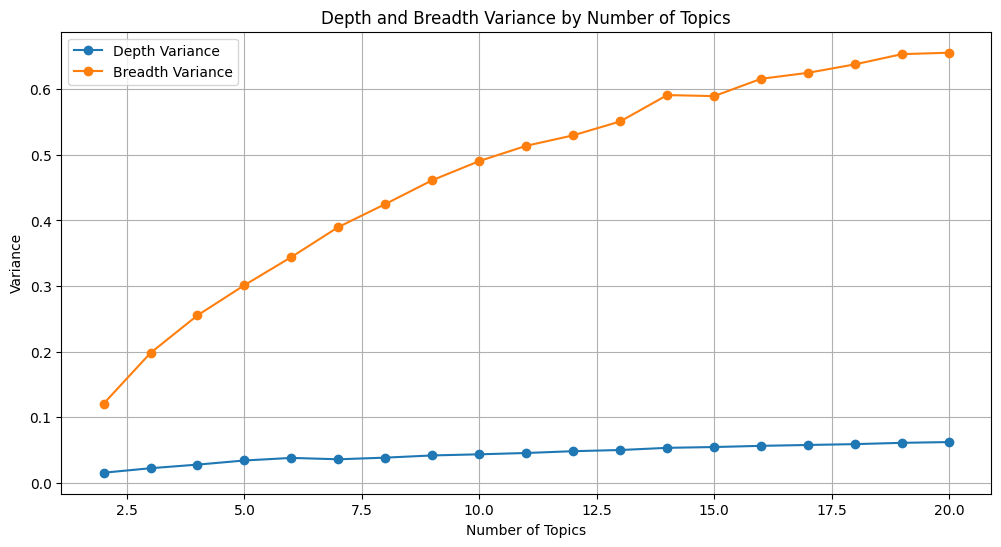

In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("/Users/hyunwoo/Desktop/PADA_LAB/raw/hotel.csv")

# 텍스트 데이터를 전처리
df['Review_Text'] = df['Review_Text'].fillna('')

# 텍스트 데이터를 TF-IDF 벡터로 변환
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Review_Text'])

# 주제 수를 변경하며 최적의 주제 수 찾기
topic_range = range(2, 21)  # 주제 수를 2부터 20까지 시도
depth_variances = []
breadth_variances = []
optimal_topics = 0
max_depth_variance = 0

for num_topics in topic_range:
    nmf = NMF(n_components=num_topics, random_state=42)
    nmf.fit(X)
    
    topic_contributions = nmf.transform(X)
    topic_contributions = np.maximum(topic_contributions, 1e-20)
    topic_contributions_normalized = topic_contributions / topic_contributions.sum(axis=1)[:, np.newaxis]
    
    # Depth 계산
    depth = -1 * np.sum(topic_contributions_normalized * np.log10(topic_contributions_normalized), axis=1)
    depth_variance = np.var(depth)
    depth_variances.append(depth_variance)
    
    # Breadth 계산
    global_topic_proportions = np.mean(topic_contributions_normalized, axis=0)
    
    def calculate_kl_divergence(review_topic_proportions, global_topic_proportions):
        review_topic_proportions = review_topic_proportions + 1e-10
        global_topic_proportions = global_topic_proportions + 1e-10
        kl_divergence = np.sum(review_topic_proportions * np.log2(review_topic_proportions / global_topic_proportions))
        if np.isnan(kl_divergence) or np.isinf(kl_divergence):
            return np.nan
        return kl_divergence
    
    breadth = np.apply_along_axis(lambda x: calculate_kl_divergence(x, global_topic_proportions), axis=1, arr=topic_contributions_normalized)
    breadth_variance = np.var(breadth)
    breadth_variances.append(breadth_variance)
    
    # 최적의 주제 수 업데이트
    if depth_variance > max_depth_variance:
        max_depth_variance = depth_variance
        optimal_topics = num_topics

print(f"Optimal number of topics: {optimal_topics}")

# 최적의 주제 수로 모델링 및 결과 저장
nmf = NMF(n_components=optimal_topics, random_state=42)
nmf.fit(X)

topic_contributions = nmf.transform(X)
topic_contributions = np.maximum(topic_contributions, 1e-20)
topic_contributions_normalized = topic_contributions / topic_contributions.sum(axis=1)[:, np.newaxis]

depth = -1 * np.sum(topic_contributions_normalized * np.log10(topic_contributions_normalized), axis=1)
global_topic_proportions = np.mean(topic_contributions_normalized, axis=0)
breadth = np.apply_along_axis(lambda x: calculate_kl_divergence(x, global_topic_proportions), axis=1, arr=topic_contributions_normalized)

df['depth'] = depth
df['breadth'] = breadth

for i in range(optimal_topics):
    df[f"Topic_{i+1}"] = topic_contributions_normalized[:, i]

df.to_csv('hotel_reviews_with_optimal_topics.csv', index=False)

print("Results saved to 'hotel_reviews_with_optimal_topics.csv'")

# 그래프 출력
plt.figure(figsize=(12, 6))
plt.plot(topic_range, depth_variances, label='Depth Variance', marker='o')
plt.plot(topic_range, breadth_variances, label='Breadth Variance', marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Variance")
plt.title("Depth and Breadth Variance by Number of Topics")
plt.legend()
plt.grid()
plt.show()


Optimal number of topics: 18
Results saved to 'hotel_reviews_with_optimal_topics.csv'


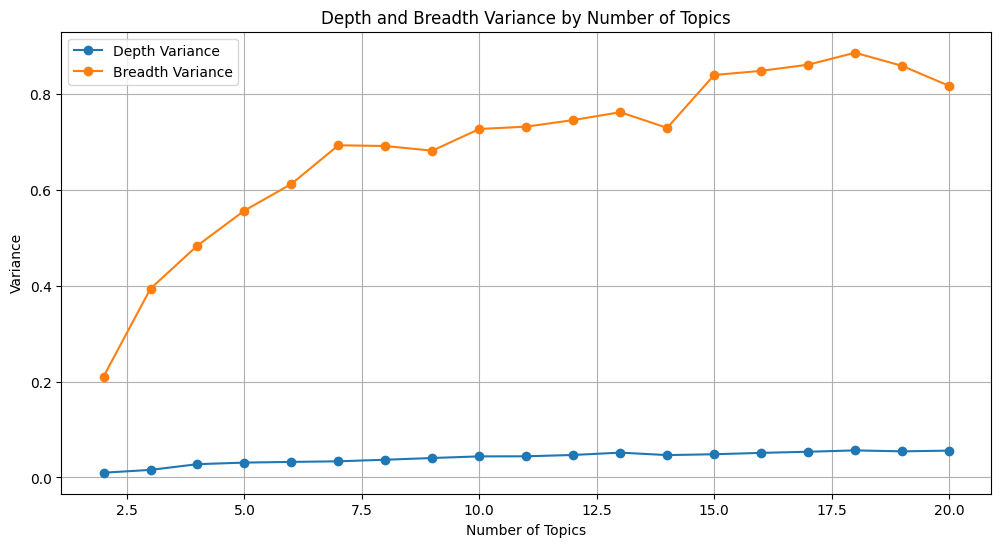

In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("/Users/hyunwoo/Desktop/PADA_LAB/raw/amazon.csv")

# 텍스트 데이터를 전처리
df['Review_Text'] = df['Review_Text'].fillna('')

# 텍스트 데이터를 TF-IDF 벡터로 변환
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Review_Text'])

# 주제 수를 변경하며 최적의 주제 수 찾기
topic_range = range(2, 21)  # 주제 수를 2부터 20까지 시도
depth_variances = []
breadth_variances = []
optimal_topics = 0
max_depth_variance = 0

for num_topics in topic_range:
    nmf = NMF(n_components=num_topics, random_state=42)
    nmf.fit(X)
    
    topic_contributions = nmf.transform(X)
    topic_contributions = np.maximum(topic_contributions, 1e-20)
    topic_contributions_normalized = topic_contributions / topic_contributions.sum(axis=1)[:, np.newaxis]
    
    # Depth 계산
    depth = -1 * np.sum(topic_contributions_normalized * np.log10(topic_contributions_normalized), axis=1)
    depth_variance = np.var(depth)
    depth_variances.append(depth_variance)
    
    # Breadth 계산
    global_topic_proportions = np.mean(topic_contributions_normalized, axis=0)
    
    def calculate_kl_divergence(review_topic_proportions, global_topic_proportions):
        review_topic_proportions = review_topic_proportions + 1e-10
        global_topic_proportions = global_topic_proportions + 1e-10
        kl_divergence = np.sum(review_topic_proportions * np.log2(review_topic_proportions / global_topic_proportions))
        if np.isnan(kl_divergence) or np.isinf(kl_divergence):
            return np.nan
        return kl_divergence
    
    breadth = np.apply_along_axis(lambda x: calculate_kl_divergence(x, global_topic_proportions), axis=1, arr=topic_contributions_normalized)
    breadth_variance = np.var(breadth)
    breadth_variances.append(breadth_variance)
    
    # 최적의 주제 수 업데이트
    if depth_variance > max_depth_variance:
        max_depth_variance = depth_variance
        optimal_topics = num_topics

print(f"Optimal number of topics: {optimal_topics}")

# 최적의 주제 수로 모델링 및 결과 저장
nmf = NMF(n_components=optimal_topics, random_state=42)
nmf.fit(X)

topic_contributions = nmf.transform(X)
topic_contributions = np.maximum(topic_contributions, 1e-20)
topic_contributions_normalized = topic_contributions / topic_contributions.sum(axis=1)[:, np.newaxis]

depth = -1 * np.sum(topic_contributions_normalized * np.log10(topic_contributions_normalized), axis=1)
global_topic_proportions = np.mean(topic_contributions_normalized, axis=0)
breadth = np.apply_along_axis(lambda x: calculate_kl_divergence(x, global_topic_proportions), axis=1, arr=topic_contributions_normalized)

df['depth'] = depth
df['breadth'] = breadth

for i in range(optimal_topics):
    df[f"Topic_{i+1}"] = topic_contributions_normalized[:, i]

df.to_csv('amazon_reviews_with_optimal_topics.csv', index=False)

print("Results saved to 'hotel_reviews_with_optimal_topics.csv'")

# 그래프 출력
plt.figure(figsize=(12, 6))
plt.plot(topic_range, depth_variances, label='Depth Variance', marker='o')
plt.plot(topic_range, breadth_variances, label='Breadth Variance', marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Variance")
plt.title("Depth and Breadth Variance by Number of Topics")
plt.legend()
plt.grid()
plt.show()


Optimal number of topics: 20
Results saved to 'hotel_reviews_with_optimal_topics.csv'


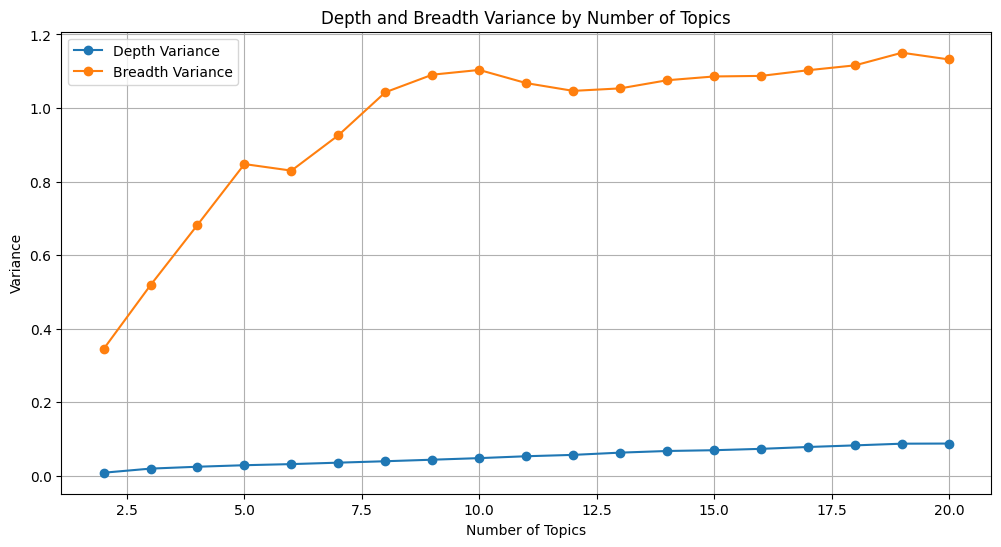

In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("/Users/hyunwoo/Desktop/PADA_LAB/raw/coursera.csv")

# 텍스트 데이터를 전처리
df['Review_Text'] = df['Review_Text'].fillna('')

# 텍스트 데이터를 TF-IDF 벡터로 변환
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Review_Text'])

# 주제 수를 변경하며 최적의 주제 수 찾기
topic_range = range(2, 21)  # 주제 수를 2부터 20까지 시도
depth_variances = []
breadth_variances = []
optimal_topics = 0
max_depth_variance = 0

for num_topics in topic_range:
    nmf = NMF(n_components=num_topics, random_state=42)
    nmf.fit(X)
    
    topic_contributions = nmf.transform(X)
    topic_contributions = np.maximum(topic_contributions, 1e-20)
    topic_contributions_normalized = topic_contributions / topic_contributions.sum(axis=1)[:, np.newaxis]
    
    # Depth 계산
    depth = -1 * np.sum(topic_contributions_normalized * np.log10(topic_contributions_normalized), axis=1)
    depth_variance = np.var(depth)
    depth_variances.append(depth_variance)
    
    # Breadth 계산
    global_topic_proportions = np.mean(topic_contributions_normalized, axis=0)
    
    def calculate_kl_divergence(review_topic_proportions, global_topic_proportions):
        review_topic_proportions = review_topic_proportions + 1e-10
        global_topic_proportions = global_topic_proportions + 1e-10
        kl_divergence = np.sum(review_topic_proportions * np.log2(review_topic_proportions / global_topic_proportions))
        if np.isnan(kl_divergence) or np.isinf(kl_divergence):
            return np.nan
        return kl_divergence
    
    breadth = np.apply_along_axis(lambda x: calculate_kl_divergence(x, global_topic_proportions), axis=1, arr=topic_contributions_normalized)
    breadth_variance = np.var(breadth)
    breadth_variances.append(breadth_variance)
    
    # 최적의 주제 수 업데이트
    if depth_variance > max_depth_variance:
        max_depth_variance = depth_variance
        optimal_topics = num_topics

print(f"Optimal number of topics: {optimal_topics}")

# 최적의 주제 수로 모델링 및 결과 저장
nmf = NMF(n_components=optimal_topics, random_state=42)
nmf.fit(X)

topic_contributions = nmf.transform(X)
topic_contributions = np.maximum(topic_contributions, 1e-20)
topic_contributions_normalized = topic_contributions / topic_contributions.sum(axis=1)[:, np.newaxis]

depth = -1 * np.sum(topic_contributions_normalized * np.log10(topic_contributions_normalized), axis=1)
global_topic_proportions = np.mean(topic_contributions_normalized, axis=0)
breadth = np.apply_along_axis(lambda x: calculate_kl_divergence(x, global_topic_proportions), axis=1, arr=topic_contributions_normalized)

df['depth'] = depth
df['breadth'] = breadth

for i in range(optimal_topics):
    df[f"Topic_{i+1}"] = topic_contributions_normalized[:, i]

df.to_csv('coursera_reviews_with_optimal_topics.csv', index=False)

print("Results saved to 'hotel_reviews_with_optimal_topics.csv'")

# 그래프 출력
plt.figure(figsize=(12, 6))
plt.plot(topic_range, depth_variances, label='Depth Variance', marker='o')
plt.plot(topic_range, breadth_variances, label='Breadth Variance', marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Variance")
plt.title("Depth and Breadth Variance by Number of Topics")
plt.legend()
plt.grid()
plt.show()


/opt/homebrew/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Optimal number of topics: 20
Results saved to 'hotel_reviews_with_optimal_topics.csv'


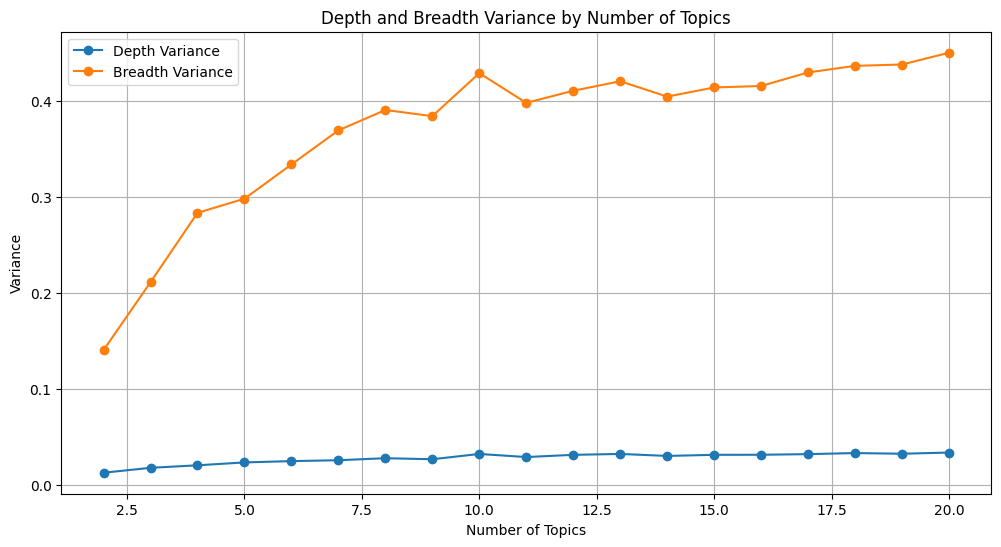

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("/Users/hyunwoo/Desktop/PADA_LAB/raw/audible.csv")

# 텍스트 데이터를 전처리
df['Review_Text'] = df['Review_Text'].fillna('')

# 텍스트 데이터를 TF-IDF 벡터로 변환
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Review_Text'])

# 주제 수를 변경하며 최적의 주제 수 찾기
topic_range = range(2, 21)  # 주제 수를 2부터 20까지 시도
depth_variances = []
breadth_variances = []
optimal_topics = 0
max_depth_variance = 0

for num_topics in topic_range:
    nmf = NMF(n_components=num_topics, random_state=42)
    nmf.fit(X)
    
    topic_contributions = nmf.transform(X)
    topic_contributions = np.maximum(topic_contributions, 1e-20)
    topic_contributions_normalized = topic_contributions / topic_contributions.sum(axis=1)[:, np.newaxis]
    
    # Depth 계산
    depth = -1 * np.sum(topic_contributions_normalized * np.log10(topic_contributions_normalized), axis=1)
    depth_variance = np.var(depth)
    depth_variances.append(depth_variance)
    
    # Breadth 계산
    global_topic_proportions = np.mean(topic_contributions_normalized, axis=0)
    
    def calculate_kl_divergence(review_topic_proportions, global_topic_proportions):
        review_topic_proportions = review_topic_proportions + 1e-10
        global_topic_proportions = global_topic_proportions + 1e-10
        kl_divergence = np.sum(review_topic_proportions * np.log2(review_topic_proportions / global_topic_proportions))
        if np.isnan(kl_divergence) or np.isinf(kl_divergence):
            return np.nan
        return kl_divergence
    
    breadth = np.apply_along_axis(lambda x: calculate_kl_divergence(x, global_topic_proportions), axis=1, arr=topic_contributions_normalized)
    breadth_variance = np.var(breadth)
    breadth_variances.append(breadth_variance)
    
    # 최적의 주제 수 업데이트
    if depth_variance > max_depth_variance:
        max_depth_variance = depth_variance
        optimal_topics = num_topics

print(f"Optimal number of topics: {optimal_topics}")

# 최적의 주제 수로 모델링 및 결과 저장
nmf = NMF(n_components=optimal_topics, random_state=42)
nmf.fit(X)

topic_contributions = nmf.transform(X)
topic_contributions = np.maximum(topic_contributions, 1e-20)
topic_contributions_normalized = topic_contributions / topic_contributions.sum(axis=1)[:, np.newaxis]

depth = -1 * np.sum(topic_contributions_normalized * np.log10(topic_contributions_normalized), axis=1)
global_topic_proportions = np.mean(topic_contributions_normalized, axis=0)
breadth = np.apply_along_axis(lambda x: calculate_kl_divergence(x, global_topic_proportions), axis=1, arr=topic_contributions_normalized)

df['depth'] = depth
df['breadth'] = breadth

for i in range(optimal_topics):
    df[f"Topic_{i+1}"] = topic_contributions_normalized[:, i]

df.to_csv('audible_reviews_with_optimal_topics.csv', index=False)

print("Results saved to 'hotel_reviews_with_optimal_topics.csv'")

# 그래프 출력
plt.figure(figsize=(12, 6))
plt.plot(topic_range, depth_variances, label='Depth Variance', marker='o')
plt.plot(topic_range, breadth_variances, label='Breadth Variance', marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Variance")
plt.title("Depth and Breadth Variance by Number of Topics")
plt.legend()
plt.grid()
plt.show()
